# Free Music Archive

[The Free Music Archive](https://github.com/mdeff/fma) contains metadata and 30 second clips of over 100,000 tracks.

In [1]:
import sqlite3
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import FMA specific utilities
import importlib.util
spec = importlib.util.spec_from_file_location("utils", "/Users/ryanswan/code/fma/utils.py")
fma = importlib.util.module_from_spec(spec)
spec.loader.exec_module(fma)

## EDA

### Tracks

In [3]:
# test = fma.load('~/Downloads/fma_metadata/tracks.csv') Throws error for some reason - need to investigate

In [4]:
# Tracks table
tracks = pd.read_csv('~/Downloads/fma_metadata/tracks.csv', index_col=0, header=[0,1])

In [5]:
print(tracks.shape)

(106574, 52)


In [6]:
print(tracks.columns)

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [7]:
print(tracks.head())

            album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                      

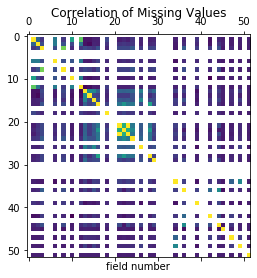

In [8]:
na_grid = tracks.applymap(pd.isna)
plt.matshow(na_grid.corr())
plt.xlabel('field number')
plt.title('Correlation of Missing Values')
plt.show()

In [9]:
row_na = na_grid.apply(sum, axis=1)

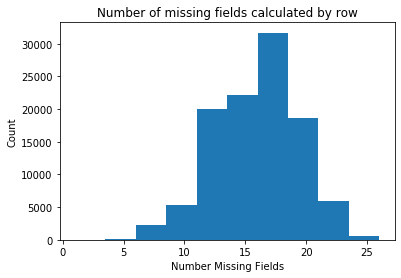

In [10]:
plt.hist(row_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by row')
plt.show()

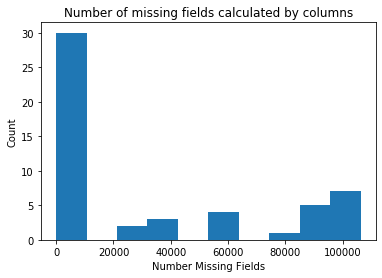

In [11]:
col_na = na_grid.apply(sum, axis=0)
plt.hist(col_na)
plt.xlabel('Number Missing Fields')
plt.ylabel('Count')
plt.title('Number of missing fields calculated by columns')
plt.show()

In [12]:
# Define class to produce these plots reliably
class NaAnalysis:
    def __init__(self, df):
        self.na_grid = df.applymap(pd.isna)
        self.row_na = self.na_grid.apply(sum, axis=1)
        self.col_na = self.na_grid.apply(sum, axis=0)
    def corr_plot(self):
        # Correlation plot
        plt.matshow(self.na_grid.corr())
        plt.xlabel('field number')
        plt.title('Correlation of Missing Values')
        plt.show()
    def row_plot(self):
        # Row Histogram
        plt.hist(self.row_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by row')
        plt.show()
    def col_plot(self):
        # Col Histogram
        plt.hist(self.col_na)
        plt.xlabel('Number Missing Fields')
        plt.ylabel('Count')
        plt.title('Number of missing fields calculated by columns')
        plt.show()
    def run_analysis(self):
        self.corr_plot()
        self.row_plot()
        self.col_plot()

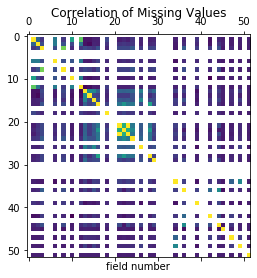

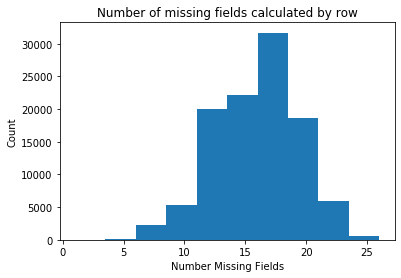

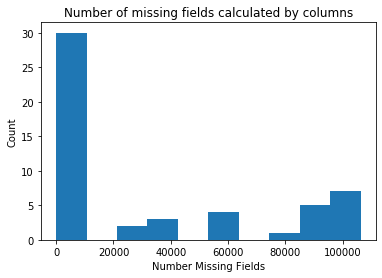

In [13]:
tracks_na = NaAnalysis(tracks)
tracks_na.run_analysis()

### Genres

In [14]:
# Genres Table
genres = pd.read_csv('~/Downloads/fma_metadata/genres.csv',header=0)

(163, 5)


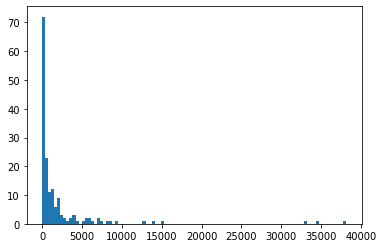

In [15]:
print(genres.shape)
plt.hist(genres['#tracks'], bins=100)
plt.show()

In [16]:
print(genres.columns)

Index(['genre_id', '#tracks', 'parent', 'title', 'top_level'], dtype='object')


In [17]:
print(genres.head(100))

    genre_id  #tracks  parent                   title  top_level
0          1     8693      38             Avant-Garde         38
1          2     5271       0           International          2
2          3     1752       0                   Blues          3
3          4     4126       0                    Jazz          4
4          5     4106       0               Classical          5
..       ...      ...     ...                     ...        ...
95       186      682      38            Sound Poetry         38
96       187      292       5  20th Century Classical          5
97       188      301      20                  Poetry         20
98       189       26      65              Talk Radio         20
99       214       40      92           North African          2

[100 rows x 5 columns]


/usr/local/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


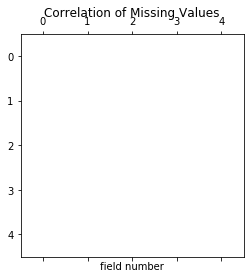

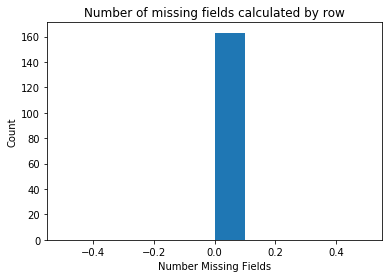

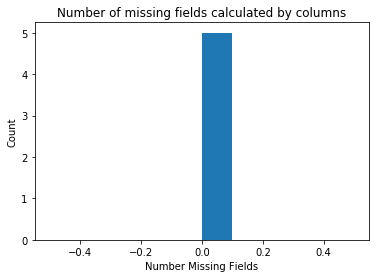

In [18]:
genres_na = NaAnalysis(genres)
genres_na.run_analysis()

The genre table is complete, and no missing values exist.

In [19]:
# We can join the genre table back to the tracks table 
# to assess how many of each genre/subgenre are present
print(tracks.columns)
tracks['id.1'].head()

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

KeyError: 'id.1'

### Features

In [20]:
# Features Table
features = pd.read_csv('~/Downloads/fma_metadata/features.csv',index_col=0,header=[0,1,2])

In [21]:
print(features.shape)

(106574, 518)


In [22]:
for f in features.columns:
  print(f)

('chroma_cens', 'kurtosis', '01')
('chroma_cens', 'kurtosis', '02')
('chroma_cens', 'kurtosis', '03')
('chroma_cens', 'kurtosis', '04')
('chroma_cens', 'kurtosis', '05')
('chroma_cens', 'kurtosis', '06')
('chroma_cens', 'kurtosis', '07')
('chroma_cens', 'kurtosis', '08')
('chroma_cens', 'kurtosis', '09')
('chroma_cens', 'kurtosis', '10')
('chroma_cens', 'kurtosis', '11')
('chroma_cens', 'kurtosis', '12')
('chroma_cens', 'max', '01')
('chroma_cens', 'max', '02')
('chroma_cens', 'max', '03')
('chroma_cens', 'max', '04')
('chroma_cens', 'max', '05')
('chroma_cens', 'max', '06')
('chroma_cens', 'max', '07')
('chroma_cens', 'max', '08')
('chroma_cens', 'max', '09')
('chroma_cens', 'max', '10')
('chroma_cens', 'max', '11')
('chroma_cens', 'max', '12')
('chroma_cens', 'mean', '01')
('chroma_cens', 'mean', '02')
('chroma_cens', 'mean', '03')
('chroma_cens', 'mean', '04')
('chroma_cens', 'mean', '05')
('chroma_cens', 'mean', '06')
('chroma_cens', 'mean', '07')
('chroma_cens', 'mean', '08')
('ch

In [23]:
print(features.head())

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       

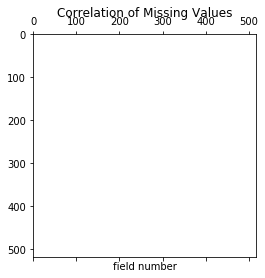

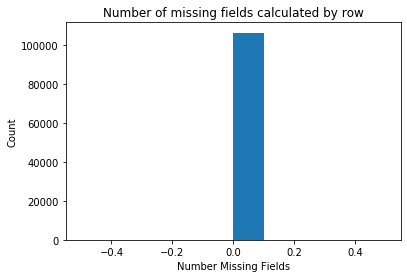

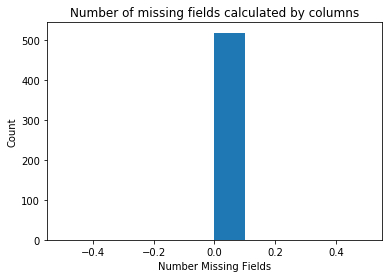

In [24]:
features_na = NaAnalysis(features)
features_na.run_analysis()

In [25]:
print(features_na.col_na.sort_values())

feature      statistics  number
chroma_cens  kurtosis    01        0
mfcc         skew        02        0
                         01        0
             min         20        0
                         19        0
                                  ..
chroma_cqt   std         10        0
                         09        0
                         08        0
chroma_stft  mean        02        0
zcr          std         01        0
Length: 518, dtype: int64


### Echonest

In [26]:
# Echonest Table
echonest = pd.read_csv('~/Downloads/fma_metadata/echonest.csv', index_col=0, header=[0,1,2])

In [27]:
print(echonest.shape)

(13129, 249)


In [28]:
for f in echonest.columns:
    print(f)

('echonest', 'audio_features', 'acousticness')
('echonest', 'audio_features', 'danceability')
('echonest', 'audio_features', 'energy')
('echonest', 'audio_features', 'instrumentalness')
('echonest', 'audio_features', 'liveness')
('echonest', 'audio_features', 'speechiness')
('echonest', 'audio_features', 'tempo')
('echonest', 'audio_features', 'valence')
('echonest', 'metadata', 'album_date')
('echonest', 'metadata', 'album_name')
('echonest', 'metadata', 'artist_latitude')
('echonest', 'metadata', 'artist_location')
('echonest', 'metadata', 'artist_longitude')
('echonest', 'metadata', 'artist_name')
('echonest', 'metadata', 'release')
('echonest', 'ranks', 'artist_discovery_rank')
('echonest', 'ranks', 'artist_familiarity_rank')
('echonest', 'ranks', 'artist_hotttnesss_rank')
('echonest', 'ranks', 'song_currency_rank')
('echonest', 'ranks', 'song_hotttnesss_rank')
('echonest', 'social_features', 'artist_discovery')
('echonest', 'social_features', 'artist_familiarity')
('echonest', 'so

In [29]:
print(echonest.head())

               echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                             

In [30]:
echonest.describe()

echonest                                               \
      audio_features                                                
        acousticness  danceability        energy instrumentalness   
count   1.312900e+04  13129.000000  13129.000000     13129.000000   
mean    5.246876e-01      0.487290      0.537516         0.640536   
std     3.837186e-01      0.190148      0.278049         0.361430   
min     9.035000e-07      0.051307      0.000020         0.000000   
25%     1.037726e-01      0.344759      0.321300         0.323466   
50%     5.739848e-01      0.485635      0.549113         0.838134   
75%     9.207270e-01      0.629094      0.776254         0.918244   
max     9.957965e-01      0.968645      0.999964         0.998016   

                                                                               \
                                                                     metadata   
           liveness   speechiness         tempo       valence artist_latitude   
count  13129.000000  13129.000000  13129.000000  13129.000000     9770.000000   
mean       0.187804      0.099174    123.080061      0.439761       39.961892   
std        0.158051      0.137381     35.015137      0.276028       15.554275   
min        0.025297      0.022324     12.753000      0.000010      -45.867100   
25%        0.101406      0.036932     95.967000      0.197321       37.784827   
50%        0.119002      0.049019    120.057000      0.417743       40.781400   
75%        0.211041      0.085452    145.318000      0.665575       47.254575   
max        0.980330      0.966177    251.072000      0.999990       68.927500   

                        ...                                                \
                        ... temporal_features                               
      artist_longitude  ...               214           215           216   
count      9770.000000  ...      13129.000000  13129.000000  13129.000000   
mean        -49.984040  ...         -1.966002     10.745951      0.308984   
std          59.377974  ...          1.708499     20.053146      0.140164   
min        -155.434000  ...        -17.966162     -1.867880      0.129023   
25%         -87.632400  ...         -2.587326      1.229409      0.242371   
50%         -74.007100  ...         -1.565120      4.355214      0.286014   
75%          -0.127140  ...         -0.875471     11.407599      0.339086   
max         174.770000  ...          1.663782    423.621094      5.211423   

                                                                             \
                                                                              
                217           218           219           220           221   
count  13129.000000  13129.000000  13129.000000  13129.000000  13129.000000   
mean       0.255381      0.163876      0.068526      4.183428      4.114902   
std        0.083731      3.484144      0.010930      4.967481      4.967004   
min        0.098280      0.000518      0.060000      0.322180      0.224580   
25%        0.208750      0.021321      0.063080      1.817050      1.749660   
50%        0.242745      0.042146      0.064490      3.094060      3.026260   
75%        0.285305      0.087516      0.070070      5.147530      5.079770   
max        1.680570    375.744781      0.342000    226.326767    226.244080   

                                   
                                   
                222           223  
count  13129.000000  13129.000000  
mean       7.605432    138.932366  
std        6.444884    225.584951  
min       -3.566834     -1.687834  
25%        2.866906     15.565598  
50%        5.502340     55.874954  
75%       10.597994    175.938553  
max       67.041878   4790.696777  

[8 rows x 244 columns]

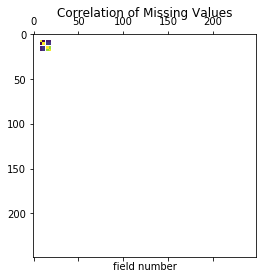

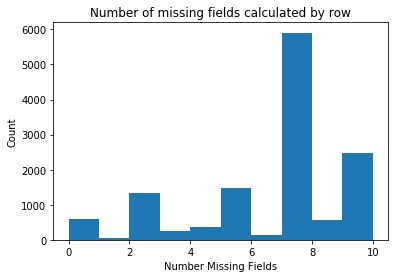

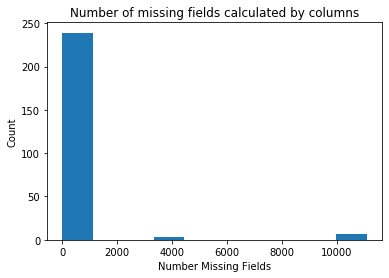

echonest  audio_features     acousticness                   0
          temporal_features  132                            0
                             133                            0
                             134                            0
                             135                            0
                                                        ...  
          ranks              artist_familiarity_rank    10304
                             artist_hotttnesss_rank     10305
          metadata           album_date                 10412
          ranks              song_hotttnesss_rank       10923
                             song_currency_rank         11096
Length: 249, dtype: int64


In [31]:
echonest_na = NaAnalysis(echonest)
echonest_na.run_analysis()
print(echonest_na.col_na.sort_values())

## Analyses

### Location Data

In [32]:
print(np.isnan(tracks.artist.latitude).sum(), 
      np.isnan(tracks.artist.longitude).sum(),
      len(tracks))

62030 62030 106574


In [33]:
import geopandas as gp
from shapely.geometry import Point, Polygon

In [34]:
geometry = [Point(xy) for xy in zip(tracks.artist.longitude,tracks.artist.latitude)]
crs = {'init' :'epsg:4326'}
geo_df = gp.GeoDataFrame(tracks, crs=crs, geometry=geometry)
geo_df.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...    track                \
         producer tags  ... interest language_code   
track_id                ...                          
2             NaN   []  ...     4656            en   
3             NaN   []  ...     1470            en   
5             NaN   []  ...     1933            en   
10            NaN   []  ...    54881            en   
20            NaN   []  ...      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                               geometry  
         number publisher tags            title                          
track_id                                                                 
2             3       NaN   []             Food  POINT (-74.406 40.058)  
3             4       NaN   []     Electric Ave  POINT (-74.406 40.058)  
5             6       NaN   []       This World  POINT (-74.406 40.058)  
10            1       NaN   []          Freeway         POINT (nan nan)  
20            3       NaN   []  Spiritual Level    POINT (0.892 51.896)  

[5 rows x 53 columns]

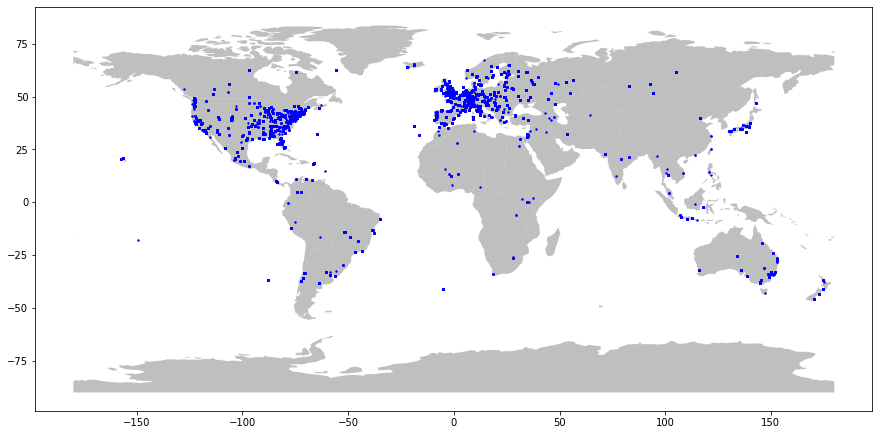

In [37]:
import geopandas as gp 

fig,ax = plt.subplots(figsize = (15,15))
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.plot(ax = ax, alpha = 0.5, color='grey')
# geo_df.plot(ax=ax, markersize = 2, color = 'blue', marker='o')
geo_df.plot(ax=ax, markersize = 2, color = 'blue', marker='o')
plt.show()

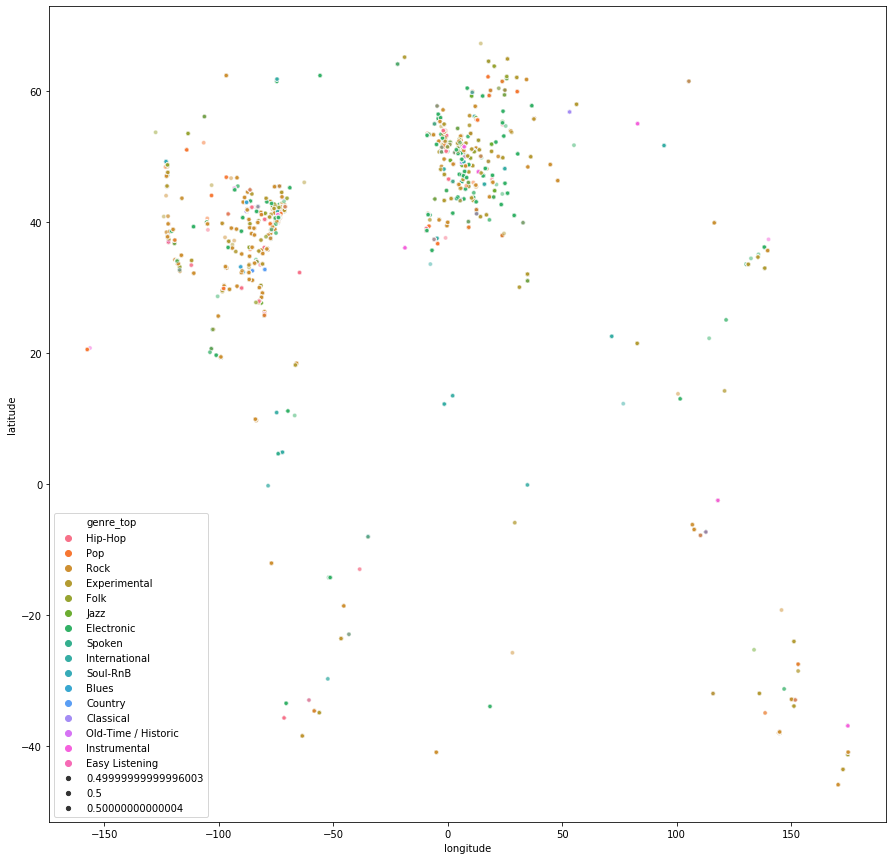

In [38]:
fig,ax = plt.subplots(figsize = (15,15))
sns.scatterplot(x=tracks.artist.longitude, 
                y=tracks.artist.latitude, 
                hue=tracks.track.genre_top, 
                size=0.5,
                alpha=0.5)
plt.show()

### Genre nesting analysis

In [39]:
genres.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [40]:
tracks.track.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [41]:
tracks.track.genre_top.isna().sum()

56976

In [42]:
tracks[pd.isna(tracks.track.genre_top)].track.genres

track_id
20            [76, 103]
26            [76, 103]
30            [76, 103]
46            [76, 103]
48            [76, 103]
              ...      
155276     [15, 32, 38]
155277     [15, 32, 38]
155278        [42, 107]
155288               []
155320    [10, 12, 169]
Name: genres, Length: 56976, dtype: object

Many of the tracks with missing genre information still seem to have genre info. However they are tagged with multiple top-level tags.

In [43]:
track_genres = tracks[pd.isna(tracks.track.genre_top)].track.genres
